In [1]:
import os
import shutil
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import math

useCuda = True
base_path = '/content/gdrive/MyDrive/APS360Project/Dataset/Ravdess/'
read_folder = 'audio_speech_actors_01-24/'
write_folder = 'sorted_actors/'
classes = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
trainFolderName = 'train/'
testFolderName = 'test/'
valFolderName = 'val/'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
if os.path.isdir(base_path + write_folder):
  shutil.rmtree(base_path + write_folder)

os.mkdir(base_path + write_folder)

for c in classes: 
  if not os.path.isdir(base_path + write_folder + c):
    os.mkdir(base_path + write_folder + c)

#Sorts the data into folders based on its class
for folderName in os.listdir(base_path + read_folder):
  print("Copying folder", folderName)
  for fileName in os.listdir(base_path + read_folder + folderName):
    emotion = classes[int(fileName.split('-')[2])-1] + "/"
    shutil.copy(base_path + read_folder + folderName + "/" + fileName, 
                base_path + write_folder + emotion + fileName) 

In [ ]:
#create training, val, test folders, 70 : 15 : 15 split


if os.path.isdir(base_path + trainFolderName):
  shutil.rmtree(base_path + trainFolderName)

if os.path.isdir(base_path + testFolderName):
  shutil.rmtree(base_path + testFolderName)

if os.path.isdir(base_path + valFolderName):
  shutil.rmtree(base_path + valFolderName)

os.mkdir(base_path + trainFolderName)
os.mkdir(base_path + testFolderName)
os.mkdir(base_path + valFolderName)

for c in classes: 
  if not os.path.isdir(base_path + trainFolderName + c):
    os.mkdir(base_path + trainFolderName + c)

for c in classes: 
  if not os.path.isdir(base_path + testFolderName + c):
    os.mkdir(base_path + testFolderName + c)

for c in classes: 
  if not os.path.isdir(base_path + valFolderName + c):
    os.mkdir(base_path + valFolderName + c)

# def createDataFolder(data, folderName, dataType):
#   print("  - Copying", len(data), "files to", base_path + dataType + folderName)
#   for d in data:  
#     shutil.copy(base_path + write_folder + folderName + "/" + d, 
#                 base_path + dataType + folderName + "/" + d) 

def createDataFolder(data, folderName, dataType):
  print("  - Copying", len(data), "files to", base_path + dataType + folderName)
  for d in data:
    y, sr = librosa.load(base_path + write_folder + folderName + "/" + d, duration=3)
    fig, ax = plt.subplots()

    #ps = librosa.feature.melspectrogram(y=y, sr=sr)
    #librosa.display.specshow(ps, y_axis='mel', x_axis='time')

    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    ps_db = librosa.power_to_db(ps, ref=np.max)
    img = librosa.display.specshow(ps_db, sr=sr, y_axis='mel', x_axis='time', ax=ax)
    
    name = d.split(".")[0]

    plt.axis('off')
    plt.savefig(base_path + dataType + folderName + "/" + name + ".png") 

for folderName in os.listdir(base_path + write_folder):
  print("Copying folder", folderName)
  files = os.listdir(base_path + write_folder + folderName)
  trainIndex = int(len(files)*0.7)
  testIndex = int(len(files)*0.85)
  createDataFolder(files[:trainIndex], folderName, trainFolderName)
  createDataFolder(files[trainIndex:testIndex], folderName, testFolderName)
  createDataFolder(files[testIndex:], folderName, valFolderName)

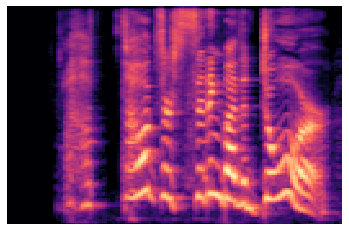

<class 'numpy.ndarray'>
(128, 130)


In [ ]:
y, sr = librosa.load(base_path + read_folder + 'Actor_20/03-01-07-02-02-02-20.wav', duration=3)
fig, ax = plt.subplots()

#ps = librosa.feature.melspectrogram(y=y, sr=sr)
#librosa.display.specshow(ps, y_axis='mel', x_axis='time')

ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps_db = librosa.power_to_db(ps, ref=np.max)
img = librosa.display.specshow(ps_db, sr=sr, y_axis='mel', x_axis='time', ax=ax)

plt.axis('off')
plt.savefig(base_path + write_folder + "out1.png")
plt.show()

print(type(ps))
print(ps.shape)

<class 'numpy.ndarray'>
(128, 130)


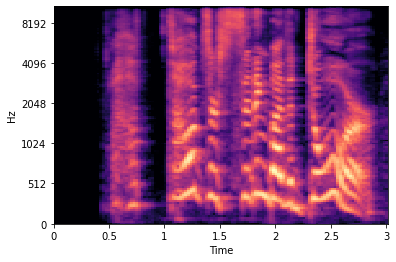

In [ ]:
y, sr = librosa.load(base_path + read_folder + 'Actor_20/03-01-07-02-02-02-20.wav', duration=3)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps_db = librosa.power_to_db(ps, ref=np.max)
librosa.display.specshow(ps_db, sr=sr, y_axis='mel', x_axis='time')
print(type(ps))
print(ps.shape)

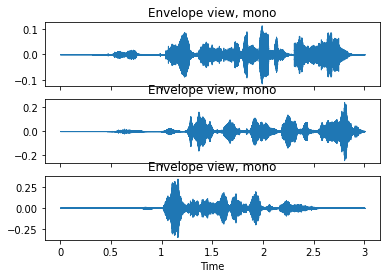

In [ ]:
y, sr = librosa.load(base_path + read_folder + 'Actor_20/03-01-07-02-02-02-20.wav', duration=3)
y1, sr1 = librosa.load(base_path + read_folder + 'Actor_20/03-01-04-02-02-02-20.wav', duration=3)
y2, sr2 = librosa.load(base_path + read_folder + 'Actor_20/03-01-05-02-02-02-20.wav', duration=3)

fig, ax = plt.subplots(nrows=3, sharex=True)

librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

librosa.display.waveshow(y1, sr=sr1, ax=ax[1])
ax[1].set(title='Envelope view, mono')
ax[1].label_outer()

librosa.display.waveshow(y2, sr=sr2, ax=ax[2])
ax[2].set(title='Envelope view, mono')
ax[2].label_outer()

In [3]:
batch_size = 64
num_workers = 1

transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

train_data = torchvision.datasets.ImageFolder(root = base_path + trainFolderName, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = num_workers, shuffle = True)

#LOADS SMALL DATASET

val_data = torchvision.datasets.ImageFolder(root = base_path + valFolderName, transform=transform)

val_loader = torch.utils.data.DataLoader(val_data, batch_size = batch_size, num_workers = num_workers, shuffle = True)

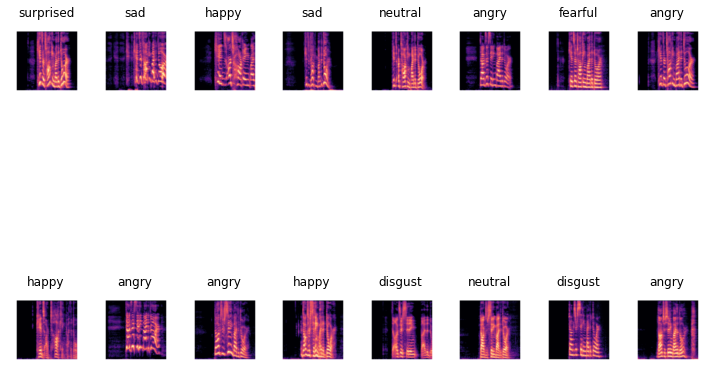

In [4]:
#Test to see if we loaded the images correctly

fig, axs = plt.subplots(2, 8, figsize=(10,10))
k = 0

for images, labels in train_loader:
  images = images.numpy()
  for r in range(2):
    for c in range(8):
      img = images[k]
      label = classes[labels[k]]
      img = np.transpose(img, [1,2,0])
      axs[r, c].imshow(img)
      axs[r,c].axis('off')
      axs[r,c].set_title(label)
      k+=1
  break

fig.tight_layout()

In [5]:
def get_model_name(name, batch_size, learning_rate, epoch):
  return "model_{0}_bs{1}_lr_{2}_epoch{3}".format(name, batch_size, learning_rate, epoch)

def get_accuracy(model, data):

    correct = 0
    total = 0
    for images, labels in data:
      if useCuda and torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()

      output = model(images) #pass the images to the model and then get the output

      #select index with maximum prediction score
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += images.shape[0]
    return correct / total

#trains the model
def trainModel(net, loader, batch_size=64, learning_rate=0.01, num_epochs=30):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), lr=learning_rate)
  # optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
  torch.manual_seed(1000)

  train_acc = np.zeros(num_epochs)
  val_acc = np.zeros(num_epochs)
  start_time = time.time()

  for epoch in range(num_epochs):
    print("Epoch", epoch)
    for images, labels in iter(loader):
      #print("Image for loop go!")
      #print(images, labels)
      
      if useCuda and torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()

      outputs = net(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    train_acc[epoch] = get_accuracy(net, loader)

    val_acc[epoch] = get_accuracy(net, val_loader)
    print("Train Accuracy Epoch {0}: {1}, Validation Accuracy: {2}".format(epoch, train_acc[epoch], val_acc[epoch]))
    # else:
    #   print("Train Accuracy Epoch {0}: {1}".format(epoch, train_acc[epoch]))

    model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
    torch.save(net.state_dict(), model_path)

  plt.plot(range(num_epochs), train_acc)
  plt.xlabel("Epochs")
  plt.ylabel("Training Accuracy")
  plt.show()  

  plt.plot(range(num_epochs), val_acc)
  plt.xlabel("Epochs")
  plt.ylabel("Validation Accuracy")
  plt.show()  

  print('Finished Training')
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

In [6]:
class CNN(nn.Module):
  def __init__(self, modelName, kernels):
    super(CNN, self).__init__()
    self.name = modelName

    #define constants and calculate size
    in_channel1 = 3
    out_channel1 = 5

    in_channel2 = out_channel1
    out_channel2 = 10

    in_channel3 = out_channel2
    out_channel3 = 15

    kernel1 = kernels[0] #5 default
    kernel2 = kernels[1] #3 default
    kernel3 = kernels[2] #5 default

    size1 = math.floor( (224 - kernel1 + 1) / 2 )
    size2 = math.floor( (size1 - kernel2 + 1) / 2 )
    size3 = math.floor( (size2 - kernel3 + 1) / 2 )
    size = math.floor(size3*size3*out_channel3)

    print("size of nn is:", size, size3)

    self.conv1 = nn.Conv2d(in_channel1, out_channel1, kernel1) # in_channel  = 3, out_channel = 5, kernel_size = 5
    self.pool = nn.MaxPool2d(2, 2) # kernel_size = 2, stride = 2
    self.conv2 = nn.Conv2d(in_channel2, out_channel2, kernel2)
    self.conv3 = nn.Conv2d(in_channel3, out_channel3, kernel3)
    self.fc1 = nn.Linear(size, 32)
    self.fc2 = nn.Linear(32, 8)
    self.size = size

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, self.size)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

print('Convolutional Neural Network Architecture Done')

Convolutional Neural Network Architecture Done


size of nn is: 9375 25
Epoch 0
Train Accuracy Epoch 0: 0.13333333333333333, Validation Accuracy: 0.13302752293577982
Epoch 1
Train Accuracy Epoch 1: 0.13333333333333333, Validation Accuracy: 0.13302752293577982
Epoch 2
Train Accuracy Epoch 2: 0.19900497512437812, Validation Accuracy: 0.26146788990825687
Epoch 3
Train Accuracy Epoch 3: 0.21990049751243781, Validation Accuracy: 0.23853211009174313
Epoch 4
Train Accuracy Epoch 4: 0.2208955223880597, Validation Accuracy: 0.22935779816513763
Epoch 5
Train Accuracy Epoch 5: 0.21791044776119403, Validation Accuracy: 0.19724770642201836
Epoch 6
Train Accuracy Epoch 6: 0.2626865671641791, Validation Accuracy: 0.2798165137614679
Epoch 7
Train Accuracy Epoch 7: 0.2427860696517413, Validation Accuracy: 0.21100917431192662
Epoch 8
Train Accuracy Epoch 8: 0.28756218905472636, Validation Accuracy: 0.2981651376146789
Epoch 9
Train Accuracy Epoch 9: 0.28756218905472636, Validation Accuracy: 0.30275229357798167
Epoch 10
Train Accuracy Epoch 10: 0.292537

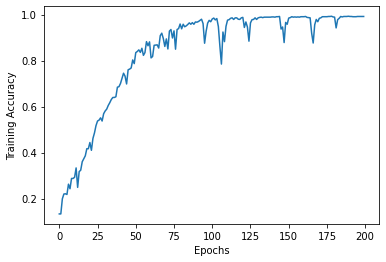

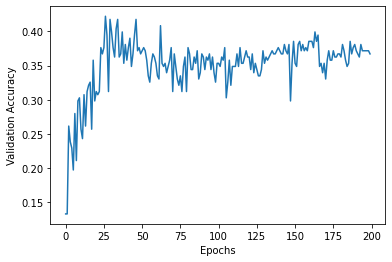

Finished Training
Total time elapsed: 3073.77 seconds


In [ ]:
testModel = CNN('testModel', [5, 3, 5])

if useCuda and torch.cuda.is_available():
  testModel.cuda()

trainModel(testModel, train_loader, 27, 0.001, 200)

size of nn is: 7935 23
Epoch 0
Train Accuracy Epoch 0: 0.13333333333333333, Validation Accuracy: 0.13302752293577982
Epoch 1
Train Accuracy Epoch 1: 0.21194029850746268, Validation Accuracy: 0.19724770642201836
Epoch 2
Train Accuracy Epoch 2: 0.2935323383084577, Validation Accuracy: 0.26146788990825687
Epoch 3
Train Accuracy Epoch 3: 0.29850746268656714, Validation Accuracy: 0.2706422018348624
Epoch 4
Train Accuracy Epoch 4: 0.30845771144278605, Validation Accuracy: 0.3256880733944954
Epoch 5
Train Accuracy Epoch 5: 0.3154228855721393, Validation Accuracy: 0.3348623853211009
Epoch 6
Train Accuracy Epoch 6: 0.3373134328358209, Validation Accuracy: 0.3256880733944954
Epoch 7
Train Accuracy Epoch 7: 0.382089552238806, Validation Accuracy: 0.3440366972477064
Epoch 8
Train Accuracy Epoch 8: 0.4298507462686567, Validation Accuracy: 0.3761467889908257
Epoch 9
Train Accuracy Epoch 9: 0.3940298507462687, Validation Accuracy: 0.2798165137614679
Epoch 10
Train Accuracy Epoch 10: 0.484577114427860

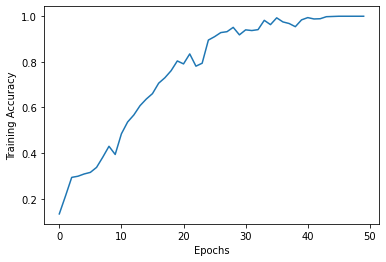

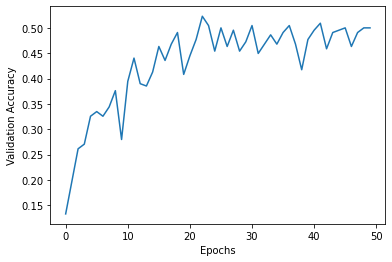

Finished Training
Total time elapsed: 804.40 seconds


In [ ]:
testModel2 = CNN('testModel2', [10, 6, 5])

if useCuda and torch.cuda.is_available():
  testModel2.cuda()

trainModel(testModel2, train_loader, 64, 0.0005, 50)

In [ ]:
best_model = CNN('bestModel', [10, 6, 5])
best_model_path = "/content/model_testModel2_bs64_lr_0.0005_epoch22"
state = torch.load(best_model_path)
best_model.load_state_dict(state)

if useCuda and torch.cuda.is_available():
    best_model.cuda()

size of nn is: 7935 23


In [ ]:
batch_size = 64
num_workers = 1

transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

test_data = torchvision.datasets.ImageFolder(root = base_path + testFolderName, transform=transform)

test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = num_workers, shuffle = True)

In [ ]:
get_accuracy(best_model, test_loader)

0.45622119815668205